In [32]:
# !pip3 install matplotlib

import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from scipy.stats import pearsonr, spearmanr
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

n_samples = 1024
n_features = 16

x_data, y_data = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1)

In [3]:
common_terms = ["age", "income", "education", "height", "weight", "experience", "skills", "salary", "years", "performance", "rating", "productivity", "customer", "satisfaction", "sales", "profit"]
random.shuffle(common_terms)

feature_names = common_terms[: x_data.shape[1]]

x_df = pd.DataFrame(x_data, columns=feature_names)
y_series = pd.Series(y_data, name="target")

In [4]:
x_df

,satisfaction,education,rating,weight,skills,customer,age,years,experience,profit,salary,performance,productivity,height,sales,income
0,-0.577396,-0.226124,0.073153,-0.373412,-0.991206,1.399230,-0.142510,0.143937,0.125175,-0.329742,0.527389,1.006704,-1.732327,-0.947724,-0.089042,0.736165
1,1.847967,-0.449693,0.326910,0.335909,1.930136,-0.816981,0.488495,0.306912,1.403290,0.921521,0.544374,-0.726521,-0.686947,-0.245137,-0.109633,-1.325154
2,0.642211,0.597946,-1.143641,0.250114,1.040239,1.283455,-1.021913,1.144554,-0.186691,-1.150438,-0.044599,0.260133,-0.069856,-0.018767,-0.836111,0.258798
3,1.209385,-1.085357,-0.527496,-0.785315,-1.063780,-0.074183,0.676409,0.460215,-0.079188,1.057214,-1.586424,0.198087,-0.217580,-0.399167,-0.172186,0.064058
4,1.336997,-0.587987,0.706722,-0.538064,-1.665814,-0.202159,-0.525424,0.829752,-0.513473,0.581807,0.547862,-0.537907,2.184323,-0.413170,-0.707902,0.806042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,-0.585854,0.599075,-0.000572,-0.656570,1.721194,-2.055056,1.828608,0.983725,-0.040365,0.578902,0.624296,-0.005015,0.838349,1.170461,-2.317783,-0.340377
1020,0.224821,-0.458305,1.834745,-0.947866,0.771819,0.098709,-0.869579,-0.108765,-0.480009,-0.305517,-0.789074,-0.098504,-1.452866,0.454475,-0.605147,-1.038472
1021,-0.693717,-1.973163,0.379050,-0.747931,-0.576122,-0.071333,-0.570691,-0.536928,0.964781,-2.535140,2.160671,-1.178345,-1.321150,-0.988928,1.187965,0.083646
1022,2.110609,-1.456164,0.646616,0.644002,1.506980,1.826728,-1.815889,-1.181631,0.817397,0.751100,0.317329,0.612681,-0.583211,-0.335091,0.300284,1.413086


In [5]:
y_series

0      -158.176801
1       371.589707
2       -61.015249
3        21.334944
4       112.957414
           ...    
1019    294.605553
1020   -275.414993
1021   -326.085445
1022    327.875937
1023   -160.692285
Name: target, Length: 1024, dtype: float64

In [6]:
#

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_series, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(x_test)

In [10]:
#

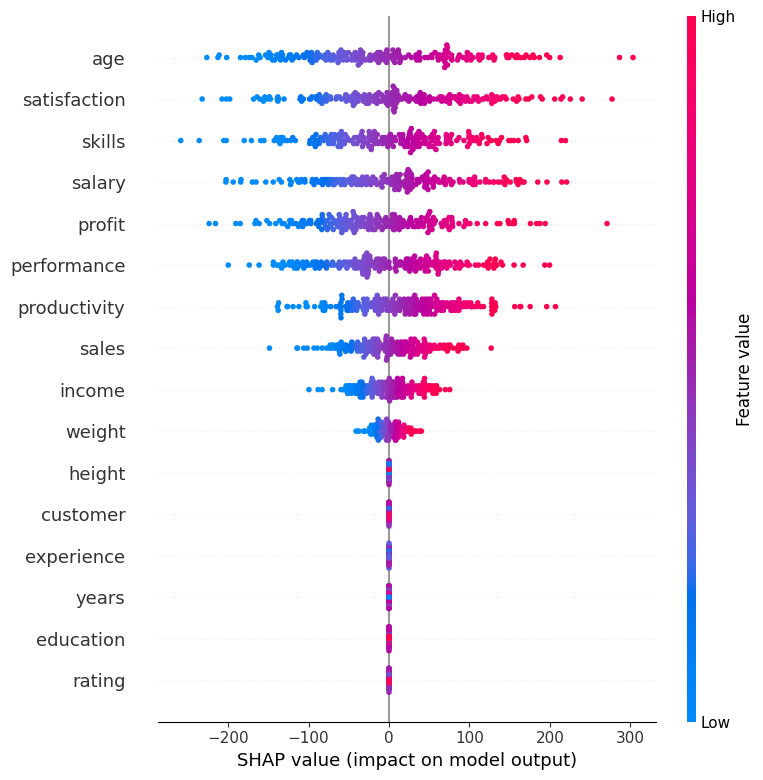

In [13]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, feature_names=feature_names)

In [16]:
shap_values.shape

(205, 16)

In [17]:
x_test.shape

(205, 16)

In [22]:
feature_names.index('age')

6

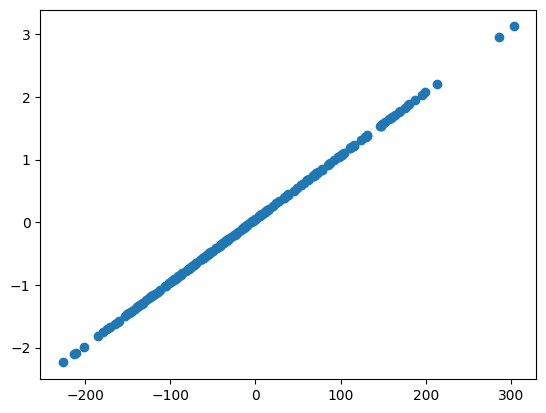

In [23]:
plt.scatter(shap_values[:, 6], x_test.iloc[:, 6])

In [28]:
slope = np.dot(shap_values[:, 6], x_test.iloc[:, 6]) / np.dot(x_test.iloc[:, 6], x_test.iloc[:, 6])

# Convert the slope to degrees (optional)
angle_degrees = np.arctan(slope) * (180 / np.pi)

print(slope)

98.80472489681915


In [30]:
spearman_corr, _ = spearmanr(shap_values[:, 6], x_test.iloc[:, 6])

In [31]:
spearman_corr

0.9999999999999999

In [42]:
pearson_corr, p_value = pearsonr(shap_values[:, 6], x_test.iloc[:, 6])

In [43]:
pearson_corr

0.9999999999999999

In [44]:
alpha = 0.05
if p_value < alpha:
	print("Reject the null hypothesis: There is a significant linear relationship.")
else:
	print("Fail to reject the null hypothesis: There is no significant linear relationship.")

Reject the null hypothesis: There is a significant linear relationship.


In [36]:
regression_model = LinearRegression()
regression_model.fit(shap_values[:, 6].reshape(-1, 1), x_test.iloc[:, 6])

predicted_values = regression_model.predict(shap_values[:, 6].reshape(-1, 1))

r_squared = r2_score(x_test.iloc[:, 6], predicted_values)

In [37]:
r_squared

1.0

In [39]:
residuals = x_test.iloc[:, 6] - predicted_values

In [40]:
residuals

525    6.661338e-16
357    2.385245e-17
444   -1.110223e-16
31    -3.330669e-16
618    8.326673e-17
           ...     
542    2.220446e-16
903    3.469447e-17
528   -8.881784e-16
294   -2.220446e-16
745   -2.775558e-17
Name: age, Length: 205, dtype: float64

In [24]:
feature_names.index('satisfaction')

0

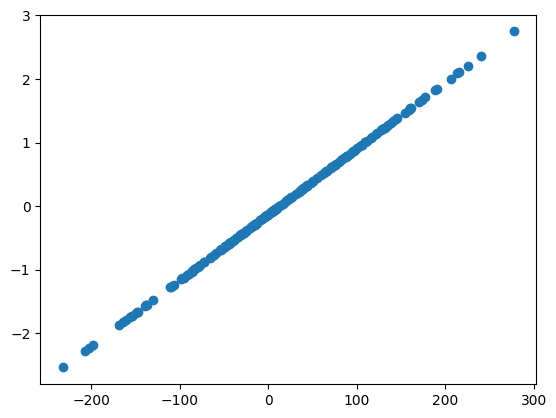

In [25]:
plt.scatter(shap_values[:, 0], x_test.iloc[:, 0])

In [27]:
slope = np.dot(shap_values[:, 0], x_test.iloc[:, 0]) / np.dot(x_test.iloc[:, 0], x_test.iloc[:, 0])

# Convert the slope to degrees (optional)
angle_degrees = np.arctan(slope) * (180 / np.pi)

print(angle_degrees)

89.40537479728188
